# Espectro JONSWAP (Joint North Sea Wave Project) da Bacia de Campos

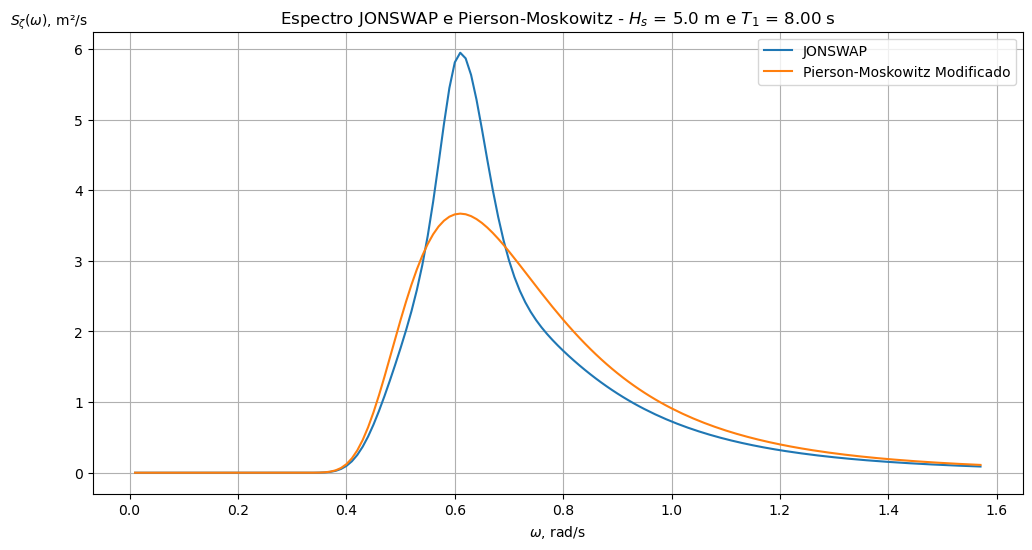

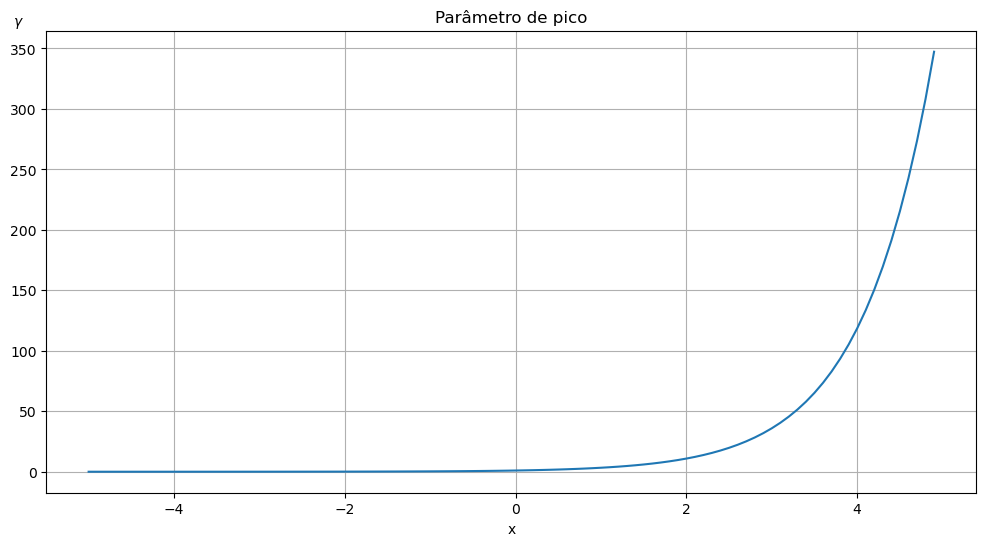

RMS para espectro de Pierson-Moskowitz: 1.232
RMS para espectro de JONSWAP: 1.235


In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import integrate

Hs = 5.0 
Tz = 8.0
Tp = 1.287*Tz
gama = 6.4*Tp**(-0.491)
dw = 0.01
w = np.arange(0.01, np.pi/2, dw)
f = w/(2*np.pi)
S_f = np.zeros_like(f)
fp = 1/Tp
for freq in f:
    ind = np.where(f == freq)
    if freq <= fp:
        sigma = 0.07
        s_f = ( (5/16) * (Hs**2) * Tp * ((fp/freq)**5) * (1-0.287*np.log(gama)) * 
               np.exp(-1.25*(freq/fp)**(-4))*gama**np.exp((-(freq-fp)**2)/(2*(sigma**2)*fp**2)))
    else:
        sigma = 0.09
        s_f = ( (5/16) * (Hs**2) * Tp * ((fp/freq)**5) * (1-0.287*np.log(gama)) * 
               np.exp(-1.25*(freq/fp)**(-4))*gama**np.exp((-(freq-fp)**2)/(2*(sigma**2)*fp**2)))
    S_f[ind] = s_f

T1 = 0.772*Tp
S_wPM = ((173*Hs**2)/(T1**4))*(w**(-5))*np.exp(-(692/(T1**4))*w**(-4))
S_fPM = S_wPM*2*np.pi
S_w = S_f/(2*np.pi)
plt.figure(figsize=(12,6))
plt.plot(w, S_w, label='JONSWAP')
plt.plot(w, S_wPM, label='Pierson-Moskowitz Modificado')
plt.grid()
plt.legend()
plt.title(r'Espectro JONSWAP e Pierson-Moskowitz - $H_s$ = {Hs} m e $T_1$ = {T1:.2f} s'.format(Hs = Hs, T1=Tz))
plt.xlabel(r'$\omega$, rad/s')
plt.ylabel(r'$S_{\zeta}(\omega)$, m²/s', loc='top', labelpad=-10, rotation=0)
plt.show()

x = np.arange(-5, 5, 0.1)
plt.figure(figsize=(12,6))
plt.plot(x, 3.3**x)
plt.grid()
plt.title('Parâmetro de pico')
plt.xlabel('x')
plt.ylabel(r'$\gamma$', loc='top', labelpad=-10, rotation=0)
plt.show()
RMS_PM = np.sqrt(integrate.simpson(S_wPM, w))
RMS_J = np.sqrt(integrate.simpson(S_w, w))
print(f"RMS para espectro de Pierson-Moskowitz: {RMS_PM:.3f}")
print(f"RMS para espectro de JONSWAP: {RMS_J:.3f}")

O parâmetro de pico reproduz a proeminência do espectro no período de pico espectral quando comparado ao espectro de Pierson-Moskowitz. Este parâmetro não altera quntidade de energia do espectro, entretanto ele desloca o pico do espectro além de acentuá-lo conforme aumenta.s.